## ダーツ投げのシミュレーションの作成

実装する上での前提条件を以下に示します。

複数のダーツのまとは、間を空けずに横一列に並んでいるとします。
ある番号のまとに狙ったダーツは、他のまとには行かないとします。

実装するフローは以下になります。

ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）
サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）
ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）
1~3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。）
各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。）

これらのフローを以下の問題を通じて一つ一つ実装していきましょう。

### 【問題1】ダーツのまとを選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。

In [1]:
import numpy as np

dice = list(range(1, 7))

selected_num = np.random.choice(dice)
selected_num

1

### 【問題2】ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 刺さった場所（座標）は、配列で保持するようにしてください。

In [10]:
locate_x = np.random.normal(selected_num, 0.1)
locate_y = np.random.normal(0, 0.1)
locate = [locate_x, locate_y]
print(locate)

[1.1561253089364099, -0.16326375757223813]


### 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。

In [11]:
result_darts = {}

for i in range(1000):
    selected_num = np.random.choice(dice)
    locate_x = np.random.normal(selected_num, 0.1)
    locate_y = np.random.normal(0, 0.1)
    locate = [locate_x, locate_y]
    
    if selected_num not in result_darts.keys():
        result_darts[selected_num] = []

    result_darts[selected_num].append(locate)

result_darts

{3: [[3.028075340284098, -0.10486329077361525],
  [3.178596852437349, 0.036110095830582556],
  [2.9351353929633857, 0.0625908850158042],
  [2.969985546783889, 0.09773674631116769],
  [3.0476335478535344, -0.05429962534307255],
  [2.921228388213115, -0.06178707462431119],
  [3.1629514103583234, -0.06322268759578543],
  [2.9923027312265624, -0.059266465793635384],
  [2.968320457080574, 0.15749572592116312],
  [2.879767632333794, 0.015800103182726722],
  [2.9322802100804983, 0.11418275042731219],
  [2.8529581391200165, -0.040855475147153125],
  [2.9465523184528726, 0.07096395367493895],
  [3.156634763596446, -0.04809434534583559],
  [3.0116731236604872, 0.0715775703966795],
  [2.9789879976549787, -0.07500255604493838],
  [3.1331762984944485, -0.06232703298426077],
  [2.9249551155879803, -0.04419066875292046],
  [2.965122568603194, -0.017065762733095933],
  [2.9690924857671286, 0.03258669903260856],
  [3.0463416657774043, 0.12221943291274846],
  [3.0032296094545337, -0.05943584194475224],


### 【問題4】ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

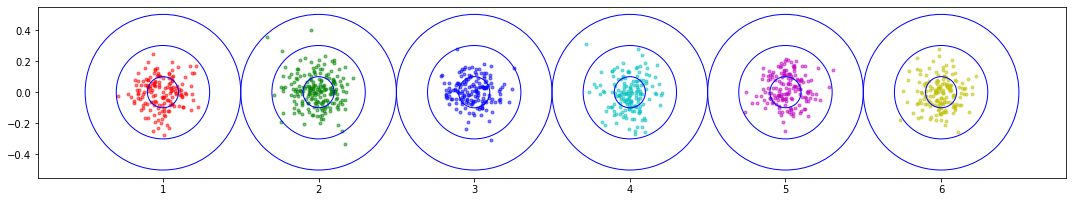

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 散布図で使用する色
colorlist = ["r", "g", "b", "c", "m", "y"]

fig = plt.figure(figsize=(15.0, 15.0))
ax = plt.axes()

for i in range(6):
    # 的の表示
    circle = patches.Circle(xy=(i+1, 0), radius=0.5, fc='none', ec='blue')
    ax.add_patch(circle)
    circle = patches.Circle(xy=(i+1, 0), radius=0.3, fc='none', ec='blue')
    ax.add_patch(circle)
    circle = patches.Circle(xy=(i+1, 0), radius=0.1, fc='none', ec='blue')
    ax.add_patch(circle)
    
    # 刺さった場所の表示
    tmp = np.array(result_darts[i+1])
    plt.scatter(tmp[:, 0], tmp[:, 1], marker=".", alpha=0.5, c=colorlist[i % len(colorlist)], label="0")
    
fig.tight_layout()
plt.axis('scaled')
ax.set_aspect('equal')

### 【問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。

In [64]:
def simulate_darts(num_trial, num_target):
    """
    [INPUT]
    num_trial:ダーツを投げる回数
    num_target:ダーツの的の数
    """

    # サイコロのリスト作成
    dice = list(range(1, num_target+1))

    # ダーツの結果
    result_darts = {}
    for i in range(num_trial):
        selected_num = np.random.choice(dice)
        locate_x = np.random.normal(selected_num, 0.1)
        locate_y = np.random.normal(0, 0.1)
        locate = [locate_x, locate_y]

        if selected_num not in result_darts.keys():
            result_darts[selected_num] = []

        result_darts[selected_num].append(locate)

    # 図の描画
    fig = plt.figure(figsize=(15.0, 15.0))
    ax = plt.axes()

    for i in range(num_target):
        # 的の表示
        circle = patches.Circle(xy=(i+1, 0), radius=0.5, fc='none', ec='blue')
        ax.add_patch(circle)
        circle = patches.Circle(xy=(i+1, 0), radius=0.3, fc='none', ec='blue')
        ax.add_patch(circle)
        circle = patches.Circle(xy=(i+1, 0), radius=0.1, fc='none', ec='blue')
        ax.add_patch(circle)

        # 刺さった場所の表示
        tmp = np.array(result_darts[i+1])
        plt.scatter(tmp[:, 0], tmp[:, 1], marker=".", alpha=0.5, c=colorlist[i % len(colorlist)], label="0")

    fig.tight_layout()
    plt.axis('scaled')
    ax.set_aspect('equal')


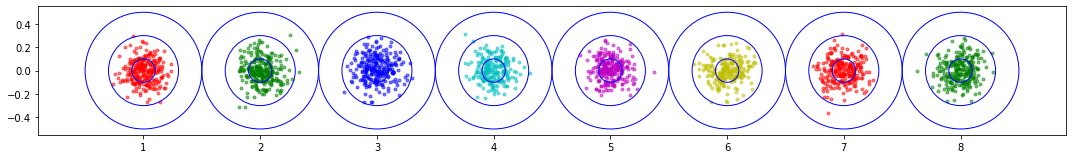

In [71]:
simulate_darts(2000, 8)